<a href="https://colab.research.google.com/github/igorrivin/myumap/blob/main/myumap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## First, we load the stuff from our repo, and the requirements

In [1]:
!git clone https://github.com/igorrivin/myumap.git

Cloning into 'myumap'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (97/97), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 97 (delta 51), reused 57 (delta 21), pack-reused 0
Unpacking objects: 100% (97/97), 10.61 MiB | 2.02 MiB/s, done.


In [2]:
!cd /content/myumap; git pull origin main

From https://github.com/igorrivin/myumap
 * branch            main       -> FETCH_HEAD
Already up to date.


In [17]:
import sys
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import HTML
from base64 import b64encode
from time import sleep


In [4]:
sys.path.append("/content/myumap/")

In [5]:
!pip install -U -r /content/myumap/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 72.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 52.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=f9133f7

In [ ]:
#!python -m pip install git+https://github.com/igorrivin/pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/igorrivin/pytube to /tmp/pip-req-build-v37ccbwu
  Running command git clone --filter=blob:none --quiet https://github.com/igorrivin/pytube /tmp/pip-req-build-v37ccbwu
  Resolved https://github.com/igorrivin/pytube to commit 0fd2a76b2a0f74799a4925ec719f4dcc3528146a
  Preparing metadata (setup.py) ... done


In [6]:
from uutils import umap_compare

In [7]:
from pytube import YouTube, Search

In [8]:
from videoproc import get_frame_list, do_data, get_dim
from sutils import *
from statsmodels.distributions.empirical_distribution import ECDF
from scenedetect import detect, ContentDetector, split_video_ffmpeg

##This is how we get data from YouTube. PyTube has convenient search functionality, and lots of nice features, but is now completely busted. Watch this space for more.

In [ ]:
s = Search("Serge Gainsbourg")

In [ ]:
s.results

[<pytube.__main__.YouTube object: videoId=GlpDf6XX_j0>,
 <pytube.__main__.YouTube object: videoId=k3Fa4lOQfbA>,
 <pytube.__main__.YouTube object: videoId=JIQiGN-vO-g>,
 <pytube.__main__.YouTube object: videoId=V6gjzNm6dA0>,
 <pytube.__main__.YouTube object: videoId=_qSVgwL7LKM>,
 <pytube.__main__.YouTube object: videoId=Z8dW4GeGN7M>,
 <pytube.__main__.YouTube object: videoId=Stz8SQ_xeNk>,
 <pytube.__main__.YouTube object: videoId=f8VOxon78S8>,
 <pytube.__main__.YouTube object: videoId=tuhHPwWWsHw>,
 <pytube.__main__.YouTube object: videoId=eWkWCFzkOvU>,
 <pytube.__main__.YouTube object: videoId=OzYnJO6RAnA>,
 <pytube.__main__.YouTube object: videoId=xSIYK1Cg9Q4>,
 <pytube.__main__.YouTube object: videoId=Wa7wjr1NwhA>,
 <pytube.__main__.YouTube object: videoId=vn9JdXEZlL8>,
 <pytube.__main__.YouTube object: videoId=g6zgLL3yFno>,
 <pytube.__main__.YouTube object: videoId=unYu22Ign1E>,
 <pytube.__main__.YouTube object: videoId=RbE_w3AVvp0>,
 <pytube.__main__.YouTube object: videoId=6RAJda

In [ ]:
s.results[0].streams

RegexMatchError: ignored

In [ ]:
video_search= s.results[0]
url = video_search.watch_url
yt = YouTube(url)

In [ ]:
yt = YouTube('http://youtube.com/watch?v=9bZkp7q19f0')

In [ ]:
streams = yt.streams.filter( file_extension='mp4').order_by('resolution').desc()

RegexMatchError: ignored

In [ ]:
streams

[<Stream: itag="137" mime_type="video/mp4" res="1080p" fps="24fps" vcodec="avc1.640028" progressive="False" type="video">, <Stream: itag="136" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.4d401f" progressive="False" type="video">, <Stream: itag="22" mime_type="video/mp4" res="720p" fps="24fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="135" mime_type="video/mp4" res="480p" fps="24fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="134" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.4d401e" progressive="False" type="video">, <Stream: itag="18" mime_type="video/mp4" res="360p" fps="24fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">, <Stream: itag="133" mime_type="video/mp4" res="240p" fps="24fps" vcodec="avc1.4d4015" progressive="False" type="video">, <Stream: itag="160" mime_type="video/mp4" res="144p" fps="24fps" vcodec="avc1.4d400c" progressive="False" type="video

In [ ]:
streams = yt.streams.filter(res="360p")

RegexMatchError: ignored

In [ ]:
fname = streams.first().download()

#For now we will use one of our own stock files for demonstration purposes. We will upload something from my computer.

In [9]:
from google.colab import files

In [10]:
files.upload()

Saving dima2.mp4 to dima2.mp4


In [11]:
fname = "dima2.mp4"

#Now we will process the file. The arguments to do_data are the file name (fname), the number of frames per second [None means every frame], the maximum number of frames to grab [2000 below], the algorithm to use for neighbors search - None is the scikit-learn algorithm, the other option is 'faiss', and whether to get all three R, G, B channels, or just one (notice that the particular video is black and white, which means that all three channels are the same).

(2000, 230400)
None
Number of coinciding images= 0
Intrinsic Dimension = 4.853205204138577
Dataset cardinality= 2000


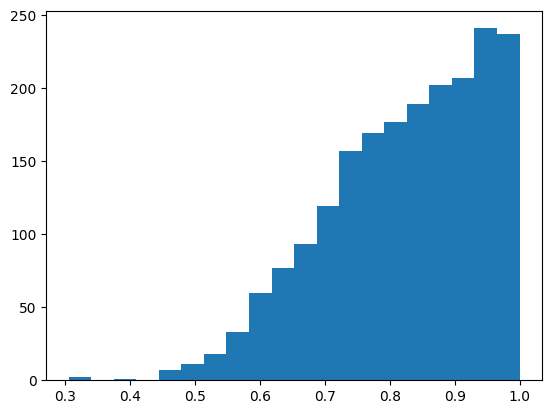

Intrinsic Dimension = 4.853205204138577
Dataset cardinality= 2000
Intrinsic Dimension = 4.853205204138577
Dataset cardinality= 2000
CPU times: user 2min 8s, sys: 5.69 s, total: 2min 14s
Wall time: 24 s


In [ ]:
%time do_data(fname, freq=None, max_count=2000, get_chan='B', algo = None)

Now we will do the same, but we add a wavelet argument. "wavelet = 0.1" means that we compute the wavelet decomposition (we use Haar wavelets here) but only keep the top 10% of the wavelet coefficients.

(2000, 230400)
None
Number of coinciding images= 0
Intrinsic Dimension = 5.180534447829254
Dataset cardinality= 2000


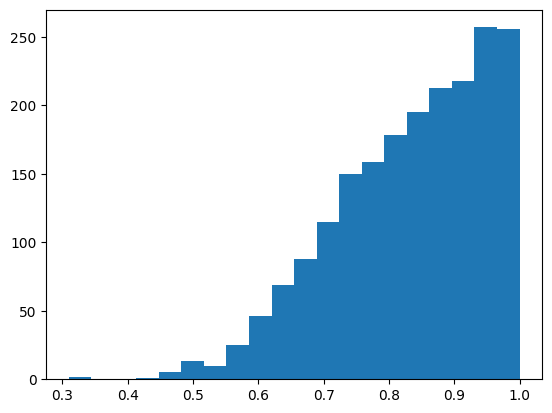

Intrinsic Dimension = 5.180534447829254
Dataset cardinality= 2000
Intrinsic Dimension = 5.180534447829254
Dataset cardinality= 2000
CPU times: user 4min 7s, sys: 5.27 s, total: 4min 12s
Wall time: 2min 21s


In [ ]:
%time do_data(fname, freq=None, max_count=2000, algo=None, get_chan='B', wavelet = 0.1)

Now let's try FAISS

(2000, 230400)
faiss
Number of coinciding images= 0
Intrinsic Dimension = 1.9776815469346232
Dataset cardinality= 1982


/content/myumap/videoproc.py:141: RuntimeWarning: invalid value encountered in true_divide
  ratios = distances[:, 0] / distances[:, 1]


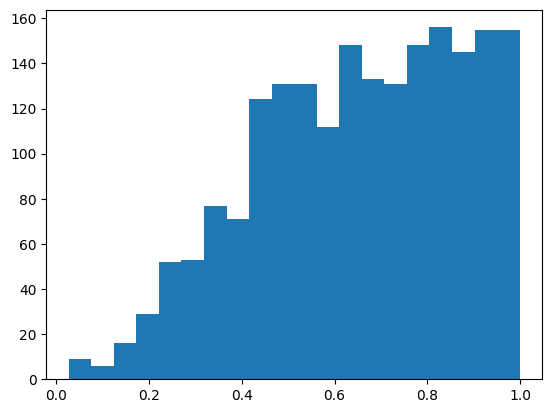

Intrinsic Dimension = 1.9776815469346232
Dataset cardinality= 1982
Intrinsic Dimension = 1.9776815469346232
Dataset cardinality= 1982
CPU times: user 30.7 s, sys: 1.41 s, total: 32.1 s
Wall time: 29.7 s


In [ ]:
%time do_data(fname,freq=None, max_count=2000, algo='faiss', get_chan='B')

We notice a couple of things. First, FAISS is MUCH faster, second, the value of the dimension is very close to half that gotten by scikit-learn, and third that the histogram of ratios looks noticeably different.

#For our next act, we will try to see what the usual dimension reduction hacks (umap, pacmap, etc) do with our frames, and see what we can see. We will look at both the original, and the wavelet-pruned versions of the file.

In [ ]:
fl, _ = get_frame_list(fname, freq=None, max_count = 2000,  get_chan='B')
flw, _ = get_frame_list(fname, freq = None, max_count=2000,  get_chan='B', wavelet=0.1)


In [ ]:
fl.shape

(2000, 230400)

The defualt algorithm for umap_compare is (not too surprisingly) umap, so we will try that first.

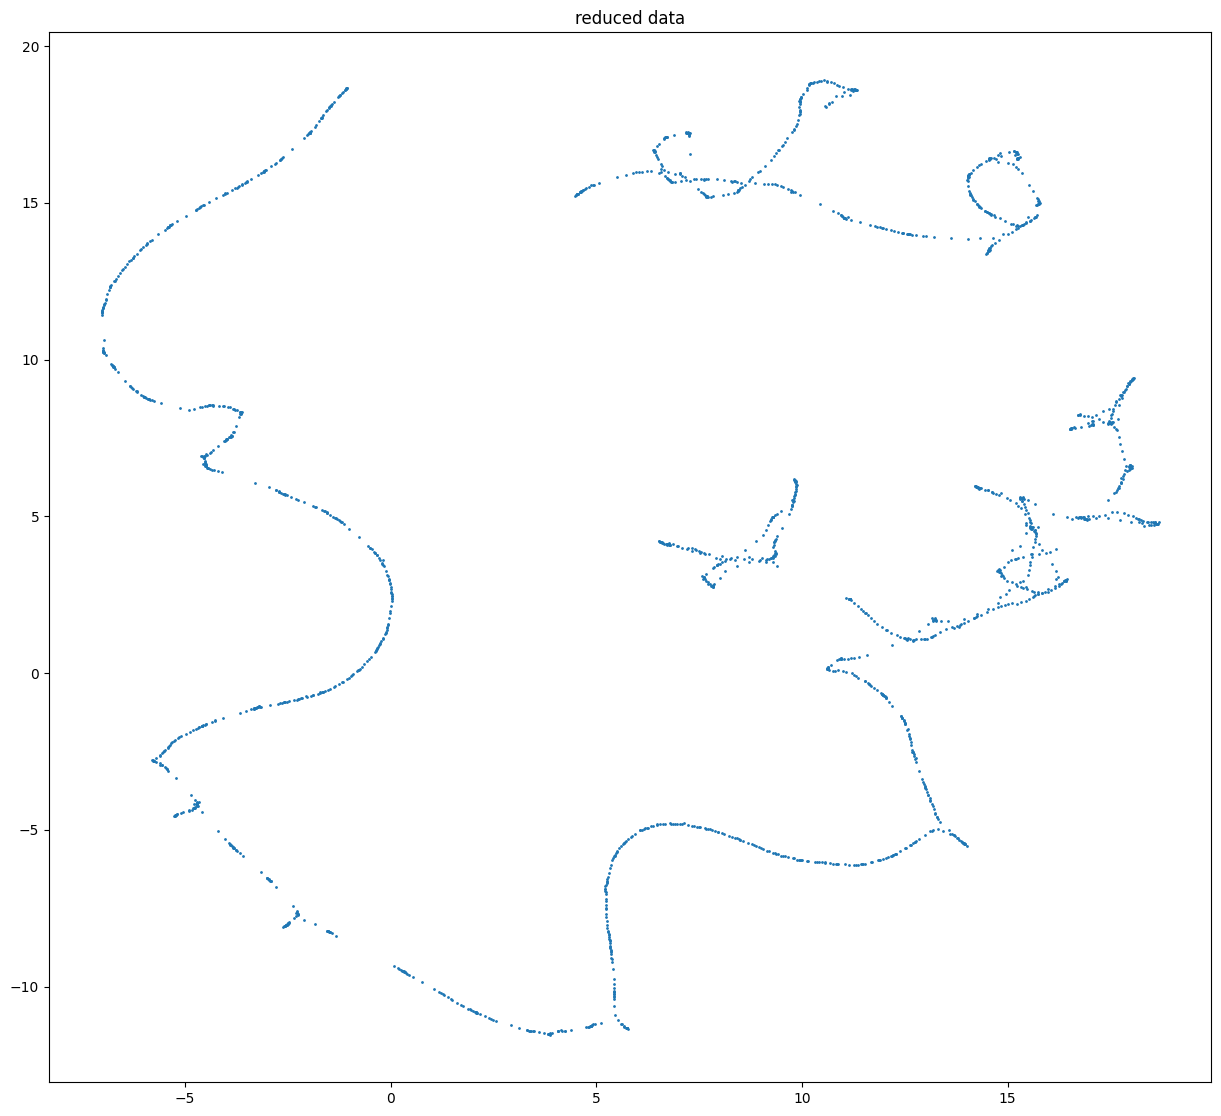

In [ ]:
umap_compare(fl, indim=100)

And now 'pacmap'

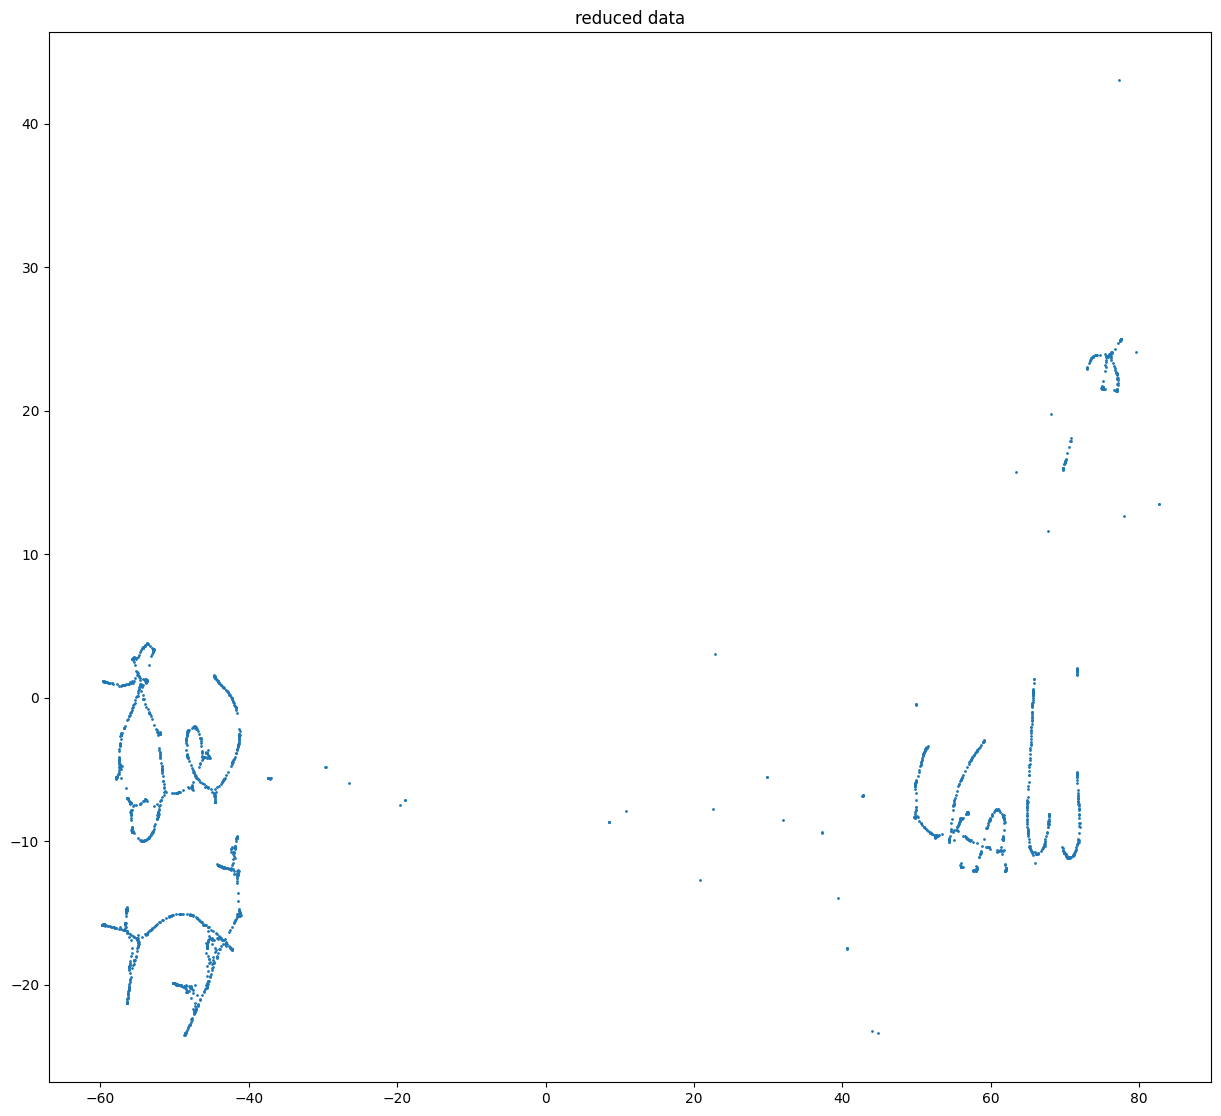

In [ ]:
umap_compare(fl, indim=100, alg='pacmap')

Now let's try three dimensions:

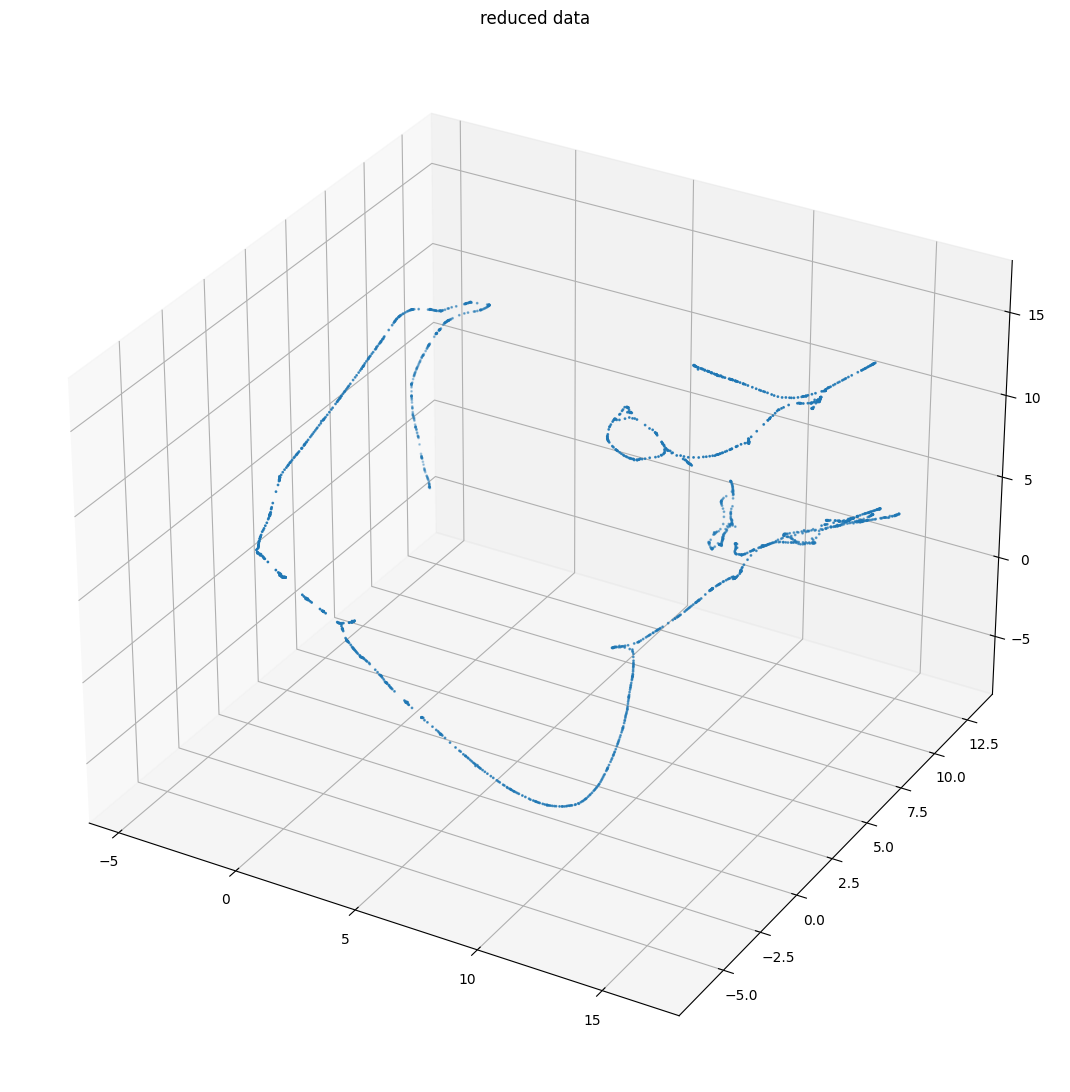

In [ ]:
umap_compare(fl, indim=100, outdim=3)

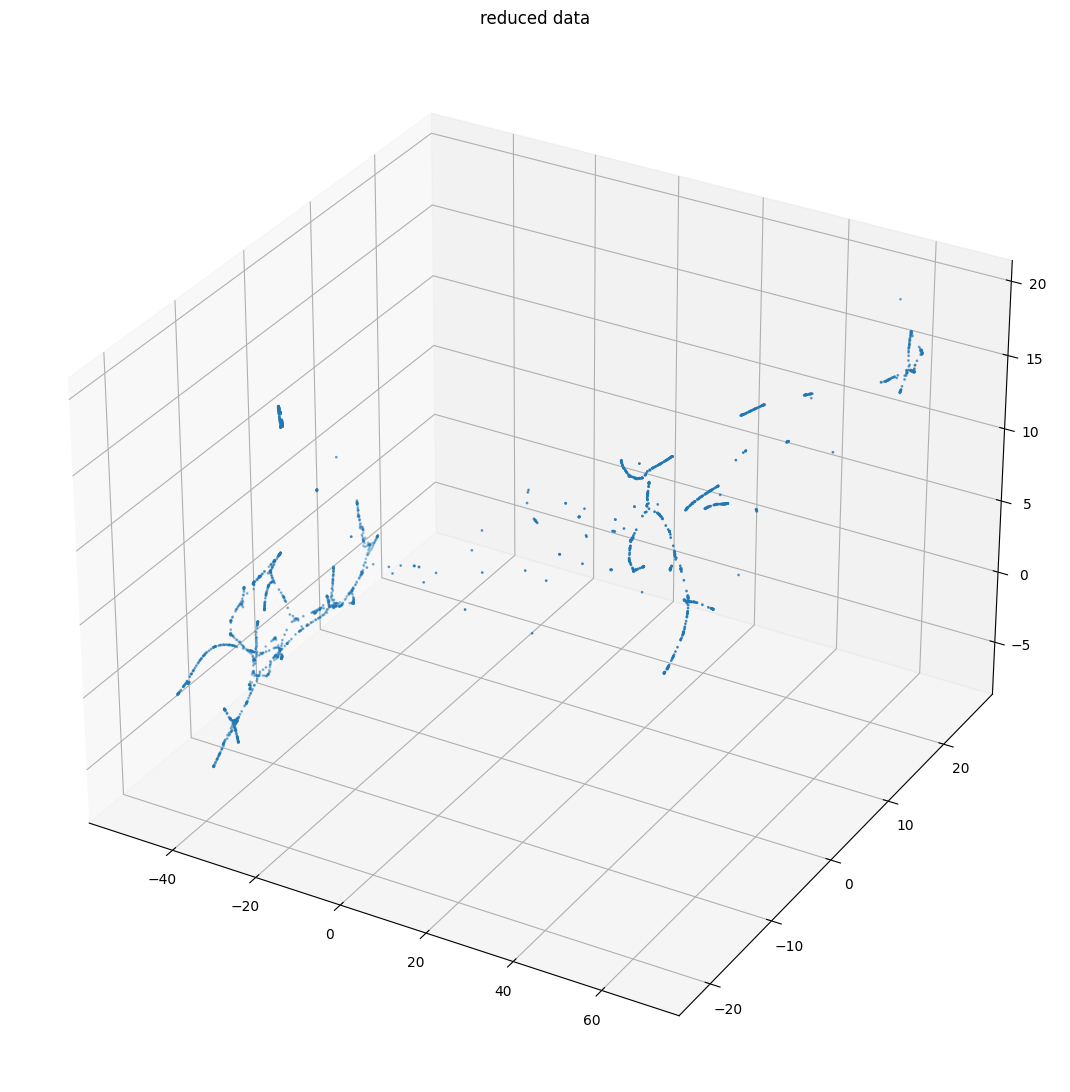

In [ ]:
umap_compare(fl, indim=100, alg='pacmap', outdim=3)

#Now we try to cluster the data, we use the Spectral Clustering algorithm from scikit-learn

In [ ]:
from sklearn.cluster import SpectralClustering

note that the default number of clusters is 8, so we will let that stand.

In [ ]:
sc = SpectralClustering(assign_labels = 'cluster_qr')

In [ ]:
sc.fit(fl)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering(assign_labels='cluster_qr')

None
Number of coinciding images= 0
Intrinsic Dimension = 2.121590833307887
Dataset cardinality= 170


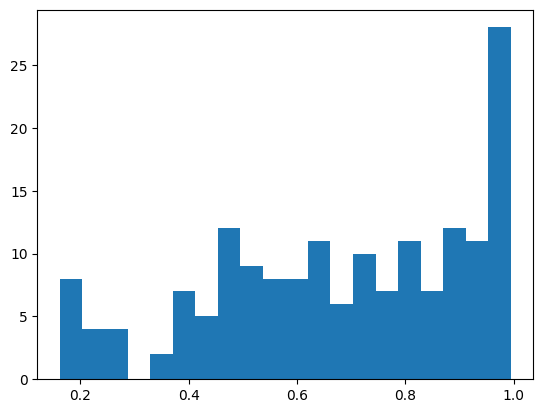

Intrinsic Dimension = 2.121590833307887
Dataset cardinality= 170
0 2.121590833307887 170
None
Number of coinciding images= 0
Intrinsic Dimension = 2.0721503482292367
Dataset cardinality= 271


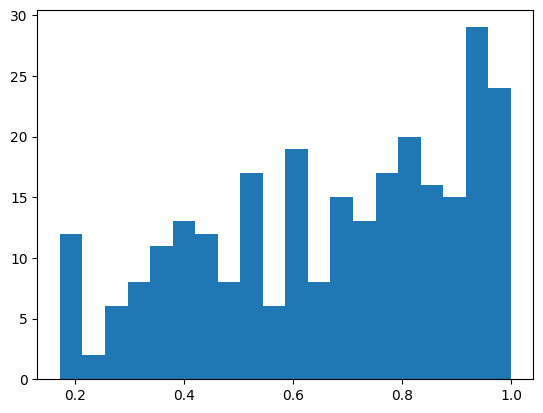

Intrinsic Dimension = 2.0721503482292367
Dataset cardinality= 271
1 2.0721503482292367 271
None
Number of coinciding images= 0
Intrinsic Dimension = 2.1990103967816976
Dataset cardinality= 269


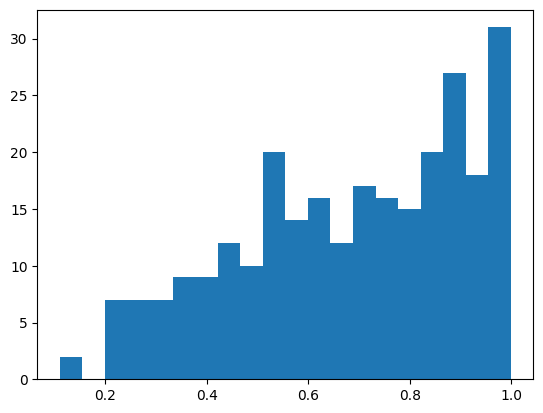

Intrinsic Dimension = 2.1990103967816976
Dataset cardinality= 269
2 2.1990103967816976 269
None
Number of coinciding images= 0
Intrinsic Dimension = 2.248648353501474
Dataset cardinality= 204


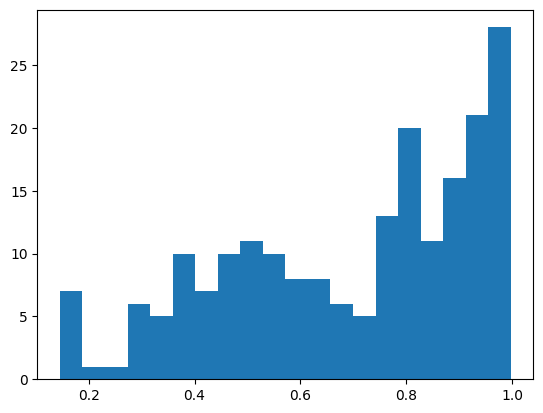

Intrinsic Dimension = 2.248648353501474
Dataset cardinality= 204
3 2.248648353501474 204
None
Number of coinciding images= 0
Intrinsic Dimension = 2.1460792656749037
Dataset cardinality= 314


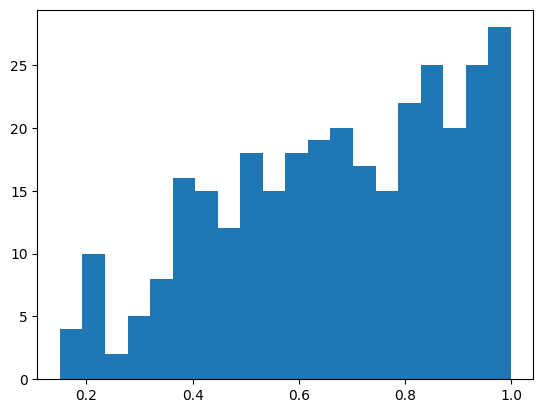

Intrinsic Dimension = 2.1460792656749037
Dataset cardinality= 314
4 2.1460792656749037 314
None
Number of coinciding images= 0
Intrinsic Dimension = 1.822087161894394
Dataset cardinality= 230


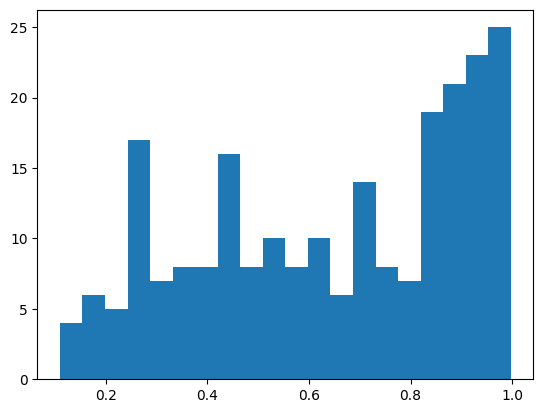

Intrinsic Dimension = 1.822087161894394
Dataset cardinality= 230
5 1.822087161894394 230
None
Number of coinciding images= 0
Intrinsic Dimension = 2.4483259544587526
Dataset cardinality= 215


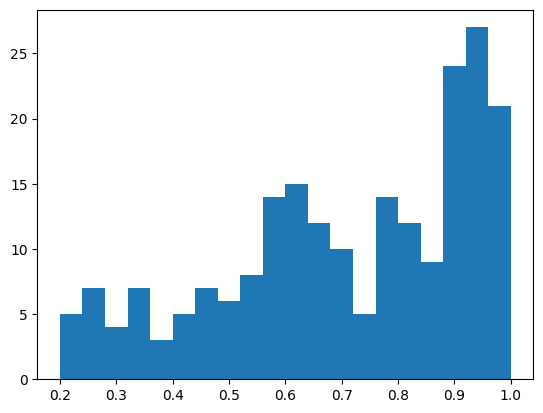

Intrinsic Dimension = 2.4483259544587526
Dataset cardinality= 215
6 2.4483259544587526 215
None
Number of coinciding images= 0
Intrinsic Dimension = 2.1305858067710317
Dataset cardinality= 327


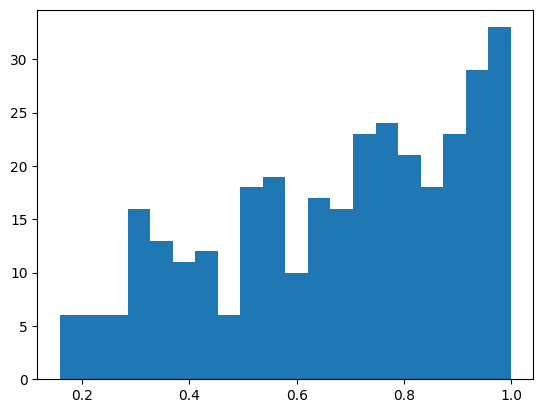

Intrinsic Dimension = 2.1305858067710317
Dataset cardinality= 327
7 2.1305858067710317 327


In [ ]:
for i in range(8):
  d, r = get_dim(fl[sc.labels_== i, :], do_plot = True)
  print(i, d, len(r))

We see that all the clusters have dimension roughly 2, but in fact, it seems that (given the UMAP, etc, output) that somehow this algorithm returns the squares of the distances, and the true dimension is 1.

faiss
Number of coinciding images= 0
Intrinsic Dimension = 1.0111083683041224
Dataset cardinality= 170


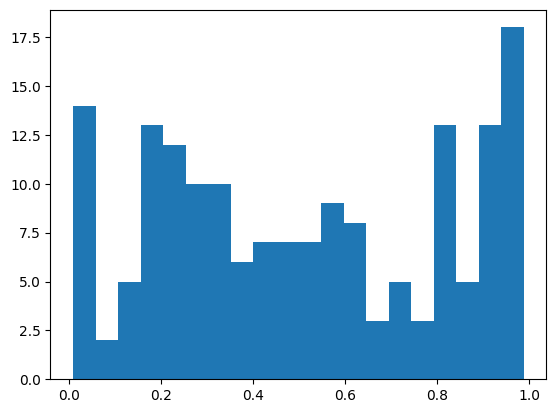

Intrinsic Dimension = 1.0111083683041224
Dataset cardinality= 170
0 1.0111083683041224 170
faiss
Number of coinciding images= 0
Intrinsic Dimension = 0.9907217125136613
Dataset cardinality= 271


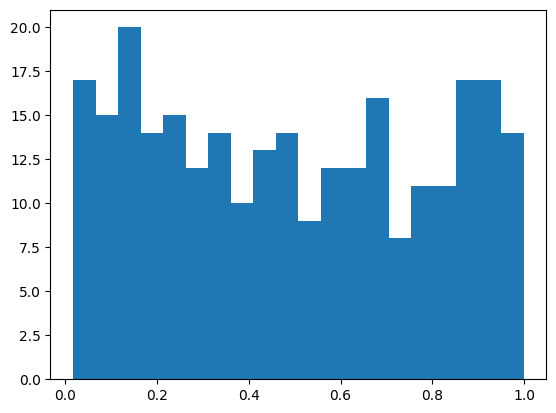

Intrinsic Dimension = 0.9907217125136613
Dataset cardinality= 271
1 0.9907217125136613 271
faiss
Number of coinciding images= 0
Intrinsic Dimension = 1.0625169811693749
Dataset cardinality= 269


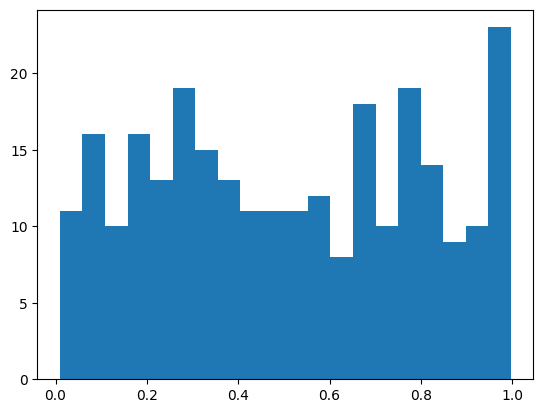

Intrinsic Dimension = 1.0625169811693749
Dataset cardinality= 269
2 1.0625169811693749 269
faiss
Number of coinciding images= 0
Intrinsic Dimension = 1.0815706049471865
Dataset cardinality= 204


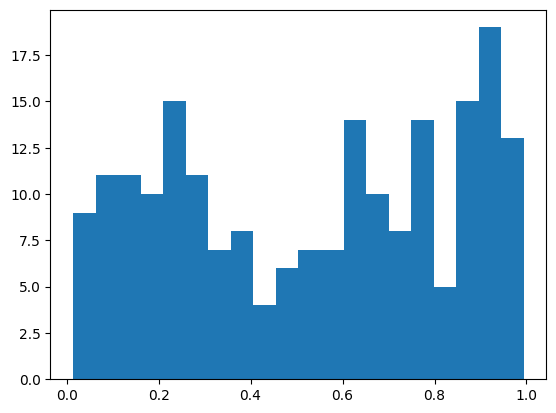

Intrinsic Dimension = 1.0815706049471865
Dataset cardinality= 204
3 1.0815706049471865 204
faiss
Number of coinciding images= 0
Intrinsic Dimension = 1.0078150190836477
Dataset cardinality= 310


/content/myumap/videoproc.py:141: RuntimeWarning: invalid value encountered in true_divide
  ratios = distances[:, 0] / distances[:, 1]


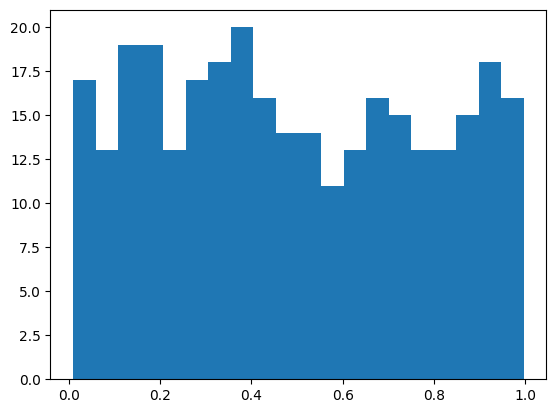

Intrinsic Dimension = 1.0078150190836477
Dataset cardinality= 310
4 1.0078150190836477 310
faiss
Number of coinciding images= 0
Intrinsic Dimension = 0.8800967091602998
Dataset cardinality= 228


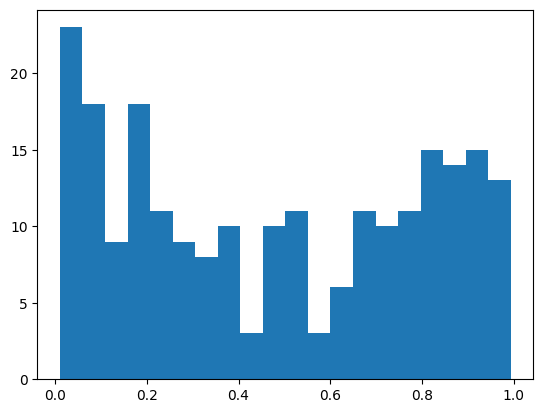

Intrinsic Dimension = 0.8800967091602998
Dataset cardinality= 228
5 0.8800967091602998 228
faiss
Number of coinciding images= 0
Intrinsic Dimension = 1.2182485307055764
Dataset cardinality= 213


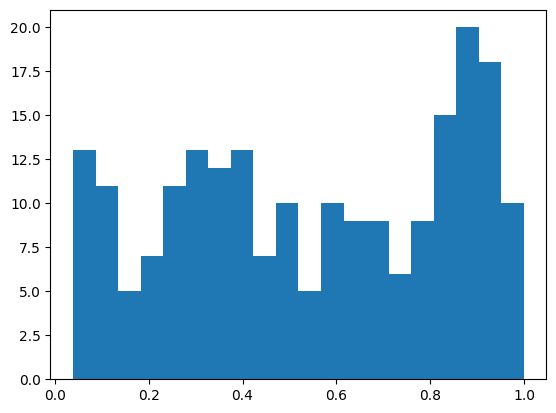

Intrinsic Dimension = 1.2182485307055764
Dataset cardinality= 213
6 1.2182485307055764 213
faiss
Number of coinciding images= 0
Intrinsic Dimension = 1.0062362377929082
Dataset cardinality= 327


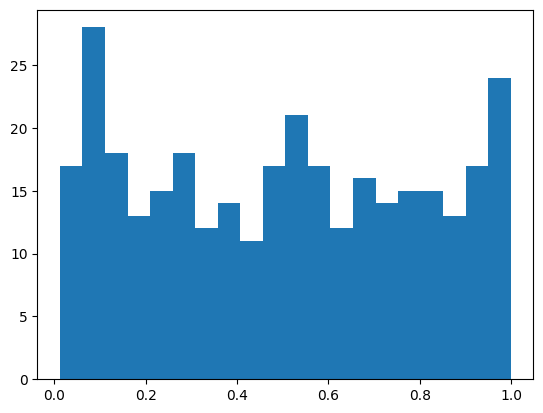

Intrinsic Dimension = 1.0062362377929082
Dataset cardinality= 327
7 1.0062362377929082 327


In [ ]:
for i in range(8):
  d, r = get_dim(fl[sc.labels_ == i, :], algo='faiss', do_plot = True)
  print(i, d,len(r))

In [ ]:
from sklearn.metrics import silhouette_score

The sihouette score tells us how well the clustering is doing. 1 is good, -1 is terrible.

In [ ]:
silhouette_score(fl, sc.labels_)

-0.02191576

Apparently not very well. Let's see if there is a better number of clusters...

In [ ]:
for i in range(2, 10):
  sc = SpectralClustering(n_clusters = i)
  sc.fit(fl)
  print(i, silhouette_score(fl, sc.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


2 0.028926414


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


3 -0.023742331


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


4 -0.046992827


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


5 -0.12009328


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


6 -0.05718456


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


7 -0.10242506


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


8 -0.25802082


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


9 -0.22479352


We see that clustering does not help. Which begs the question of why the in-cluster dimensions are different from the global dimension.

#A better option is to use scene detection software. W This takes a million options, but we will use the defaults:

In [12]:
scene_list = detect(fname, ContentDetector())

INFO:pyscenedetect:Detecting scenes...


We can get the list of scene boundaries, as follows:

In [13]:
scene_frames = []
for i, scene in enumerate(scene_list):
        scene_frames.append(( scene[0].get_frames(),scene[1].get_frames(),))

display(scene_frames)

[(0, 445), (445, 758)]

In [14]:
#If we actually want to see what the scenes look like, we can produce the clips:

split_video_ffmpeg(fname, scene_list)

INFO:pyscenedetect:Splitting input video using ffmpeg, output path template:
  $VIDEO_NAME-Scene-$SCENE_NUMBER.mp4


0

In [15]:
!ls *.mp4

dima2.mp4  dima2-Scene-001.mp4	dima2-Scene-002.mp4


We can play one of our scenes, as follows:

In [18]:
mp4 = open("dima2-Scene-001.mp4", "rb").read()
# Display video
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()
HTML(f"""
<video width=400 controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")

Now we can get the arrays of frames for the scenes (our example video is short, so we will do full RGB)

In [19]:
fls = []
for i in scene_frames:
  beg = i[0]
  end = i[1]
  tmp, _= get_frame_list(fname, max_count=end-beg, start = beg)
  fls.append(tmp)

#For our next act, we will attempt to fit a probability distribution to our ratios, and then try to see if the distribution looks anything like a mixture.

None
Number of coinciding images= 0
Intrinsic Dimension = 10.100732039534616
Dataset cardinality= 445
Intrinsic Dimension = 10.100732039534616
Dataset cardinality= 445


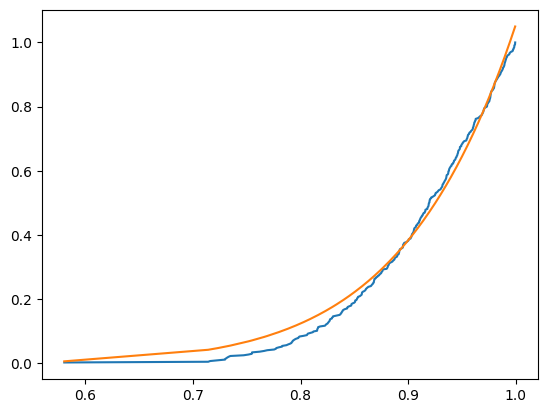

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.66409867, 0.3918058 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])

In [20]:
fl = fls[0]
p, c, d, r = get_poly(fl, degree= 50)
# Assume 'data' is your array of empirical data
#data = np.random.exponential(scale=1, size=1000)

# Generate the QQ plot
#stats.probplot(-r+1, dist='expon', plot=plt)
#plt.show()
display(c)

faiss
Number of coinciding images= 0
Intrinsic Dimension = 5.0702719900414905
Dataset cardinality= 445
Intrinsic Dimension = 5.0702719900414905
Dataset cardinality= 445


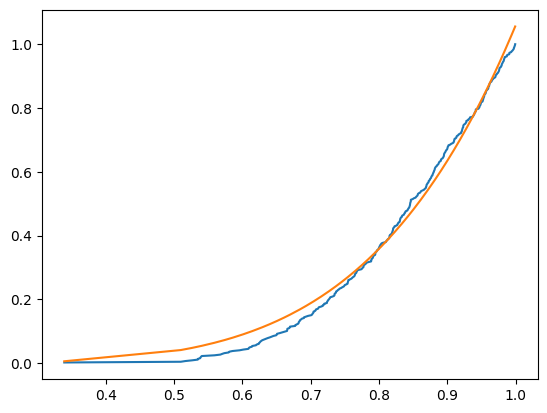

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.91840776, 0.14058708, 0.        , 0.        , 0.        ,
       0.        ])

In [21]:
p, c, d, r = get_poly(fl, degree= 50, algo='faiss')
# Assume 'data' is your array of empirical data
#data = np.random.exponential(scale=1, size=1000)

# Generate the QQ plot
##stats.probplot(-r+1, dist='expon', plot=plt)
plt.show()
display(c)

Notice that faiss produces a "cleaner" result.

Now, we can try to see if FAISS lied, and see how well we fit a beta distribution.

In [22]:
a_hat, b_hat, _, _ = stats.beta.fit(1-r, floc=0, fscale=1)

In [23]:
a_hat

1.304402971424607

In [24]:
b_hat

6.470272787031978

((array([0.00120258, 0.00237996, 0.00341146, 0.00435922, 0.00525189,
         0.00610434, 0.00692558, 0.00772159, 0.00849662, 0.00925382,
         0.00999562, 0.01072393, 0.0114403 , 0.01214601, 0.01284211,
         0.01352951, 0.01420899, 0.01488122, 0.01554677, 0.01620617,
         0.01685986, 0.01750826, 0.01815172, 0.01879058, 0.01942512,
         0.02005563, 0.02068235, 0.0213055 , 0.02192529, 0.02254191,
         0.02315553, 0.02376633, 0.02437445, 0.02498003, 0.02558322,
         0.02618412, 0.02678287, 0.02737955, 0.02797429, 0.02856718,
         0.02915831, 0.02974776, 0.03033562, 0.03092196, 0.03150686,
         0.0320904 , 0.03267263, 0.03325362, 0.03383343, 0.03441213,
         0.03498976, 0.03556638, 0.03614205, 0.0367168 , 0.03729069,
         0.03786377, 0.03843608, 0.03900765, 0.03957854, 0.04014877,
         0.0407184 , 0.04128745, 0.04185596, 0.04242396, 0.04299149,
         0.04355859, 0.04412528, 0.04469159, 0.04525755, 0.04582319,
         0.04638854, 0.04695363, 0

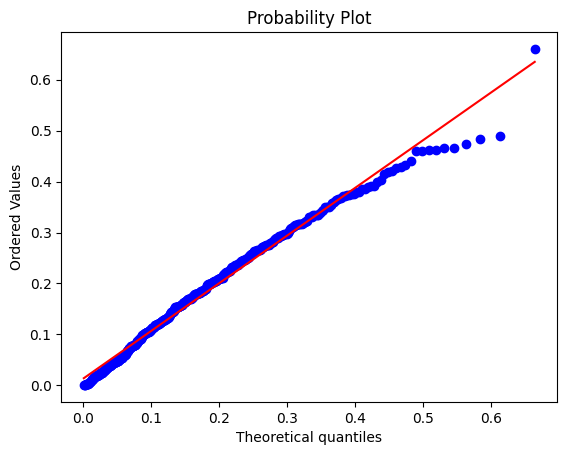

In [25]:
stats.probplot(1-r ,dist=stats.beta, sparams=(a_hat, b_hat), plot=plt)

Not bad, though the tail is a little sketchy. Now let's try the other scene:

In [26]:
fl = fls[1]

faiss
Number of coinciding images= 0
Intrinsic Dimension = 4.04657969108109
Dataset cardinality= 313
Intrinsic Dimension = 4.04657969108109
Dataset cardinality= 313


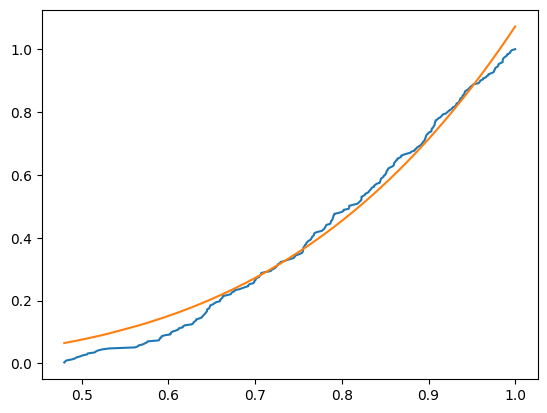

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.93074838, 0.14215605, 0.        , 0.        ,
       0.        ])

In [27]:
p, c, d, r = get_poly(fl, degree= 50, algo='faiss')
plt.show()
display(c)

In [28]:
a_hat, b_hat, _, _ = stats.beta.fit(1-r, floc=0, fscale=1)

In [29]:
a_hat

1.4046124091497068

In [30]:
b_hat

5.4957407367806725

((array([0.00265837, 0.00502002, 0.00702363, 0.00883072, 0.01051097,
         0.0120999 , 0.01361877, 0.01508154, 0.01649806, 0.01787555,
         0.01921954, 0.02053439, 0.02182359, 0.02308999, 0.02433599,
         0.02556359, 0.0267745 , 0.02797021, 0.02915201, 0.03032102,
         0.03147824, 0.03262457, 0.03376079, 0.03488762, 0.0360057 ,
         0.03711563, 0.03821792, 0.03931307, 0.04040154, 0.04148372,
         0.04256   , 0.04363074, 0.04469626, 0.04575687, 0.04681284,
         0.04786446, 0.04891196, 0.04995559, 0.05099557, 0.05203209,
         0.05306537, 0.05409558, 0.05512291, 0.05614751, 0.05716956,
         0.0581892 , 0.05920658, 0.06022184, 0.06123511, 0.06224651,
         0.06325617, 0.0642642 , 0.06527072, 0.06627584, 0.06727965,
         0.06828226, 0.06928376, 0.07028426, 0.07128383, 0.07228257,
         0.07328056, 0.07427788, 0.07527461, 0.07627084, 0.07726663,
         0.07826205, 0.07925719, 0.08025211, 0.08124687, 0.08224155,
         0.08323621, 0.08423091, 0

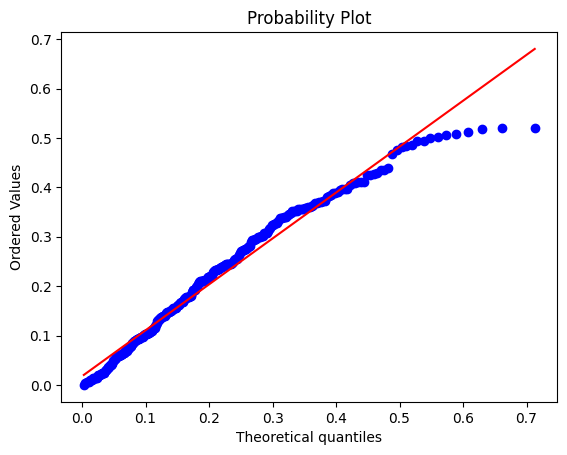

In [31]:
stats.probplot(1-r ,dist=stats.beta, sparams=(a_hat, b_hat), plot=plt)